In [1]:
setwd("C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\week4")

### Part 1: Additive Factors

In [3]:
df <- read.csv("soil_R.csv", sep=",", header=T, fileEncoding="UTF-8-BOM")
df

Response,Coating,SoilType
<int>,<int>,<int>
64,1,1
53,2,1
47,3,1
51,4,1
49,1,2
51,2,2
45,3,2
43,4,2
50,1,3


In [4]:
## factor A: soil type
## factor B: coating
CoatingFactor <- factor(df$Coating)
SoiltypeFactor <- factor(df$SoilType)
anovaResult <- aov(df$Response ~ CoatingFactor +  SoiltypeFactor, data=df)
summary(anovaResult)

               Df Sum Sq Mean Sq F value Pr(>F)
CoatingFactor   3  83.58   27.86   1.357  0.342
SoiltypeFactor  2  91.50   45.75   2.229  0.189
Residuals       6 123.17   20.53               

In [5]:
summary_anova <- summary(anovaResult)
dfA <- summary_anova[[1]][['Df']][1]
dfB <- summary_anova[[1]][['Df']][2]
dfE <- summary_anova[[1]][['Df']][3]
alpha <- 0.05

In [6]:
qf(1-alpha, dfA, dfE)

[1] 4.757063

In [7]:
qf(1-alpha, dfB, dfE)

[1] 5.143253

In [8]:
teststatA <- summary_anova[[1]][['F value']][1]
1-pf(teststatA, dfA, dfE)

[1] 0.3422155

In [9]:
teststatB <- summary_anova[[1]][['F value']][2]
1-pf(teststatB, dfB, dfE)

[1] 0.1888799

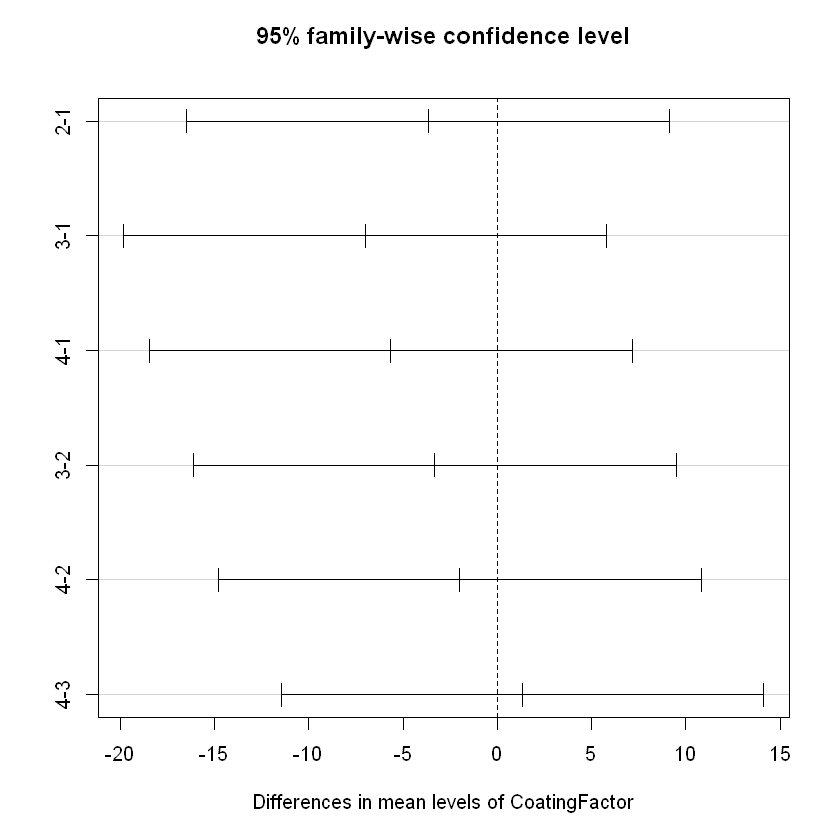

In [10]:
tk1 <- TukeyHSD(anovaResult, 'CoatingFactor', conf.level = 1-alpha)
plot(tk1)

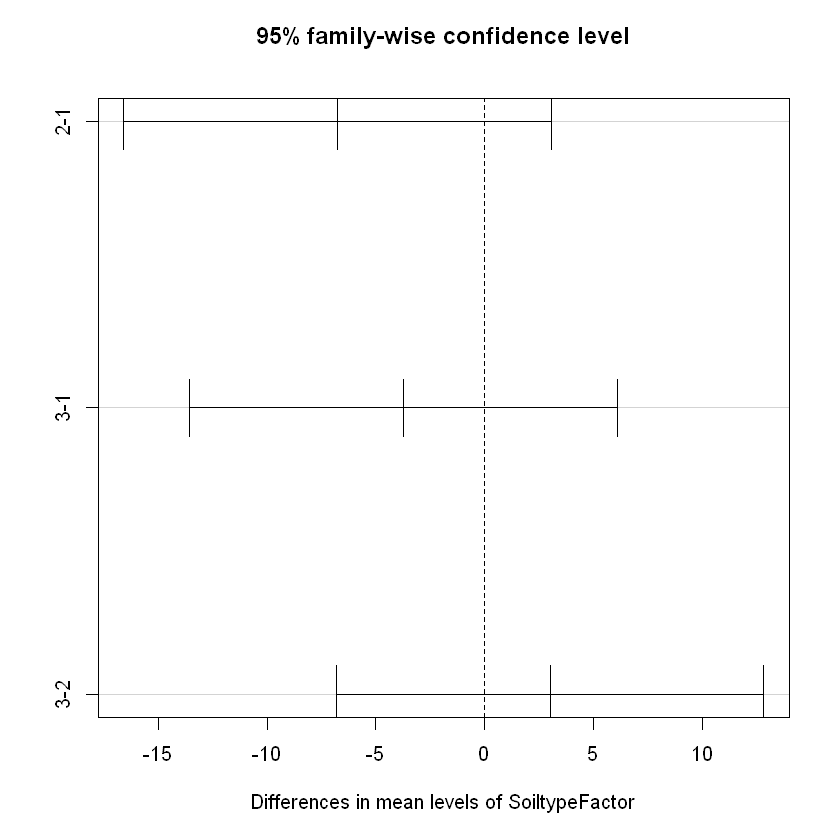

In [11]:
tk2 <- TukeyHSD(anovaResult, 'SoiltypeFactor', conf.level = 1-alpha)
plot(tk2)

### Part 2: Interactive Factors

In [12]:
df2 <- read.csv("iron_R.csv", sep=",", header=T, fileEncoding="UTF-8-BOM")
df2

Response,Concentrations,Varieties
<dbl>,<dbl>,<int>
0.71,10.2,1
1.66,10.2,1
2.01,10.2,1
2.16,10.2,1
2.42,10.2,1
2.42,10.2,1
2.56,10.2,1
2.60,10.2,1
3.31,10.2,1


In [13]:
formsFactor <- factor(df2$Varieties)
ConcenFactor <- factor(df2$Concentrations)
anovaResult <- aov(df2$Response ~ formsFactor * ConcenFactor, data=df2)
summary(anovaResult)

                          Df Sum Sq Mean Sq F value   Pr(>F)    
formsFactor                1   62.3    62.3   2.161    0.145    
ConcenFactor               2  983.6   491.8  17.073 4.02e-07 ***
formsFactor:ConcenFactor   2    8.3     4.1   0.144    0.866    
Residuals                102 2938.2    28.8                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

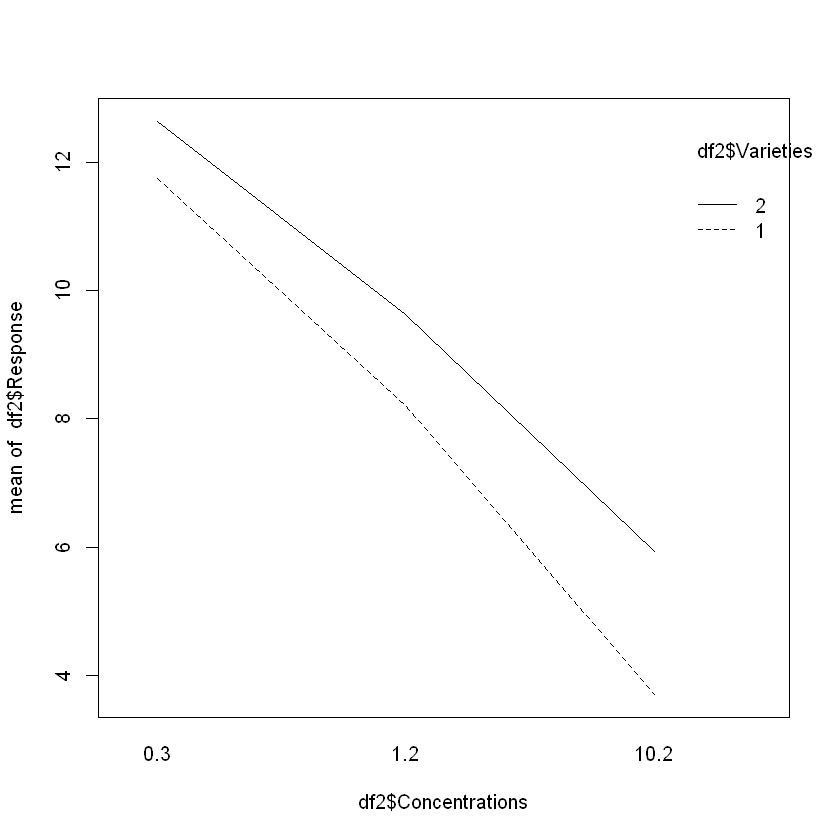

In [14]:
interaction.plot(df2$Concentrations,df2$Varieties,df2$Response)